**Name** : Poonam Raosaheb Wagh

**Roll No** : B1951020

**PRN** : 72018648L

**Class** : BE IT A

# Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random 
%matplotlib inline

# Loading and preparing the data

In [2]:
#import dataset and split into train and test 
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


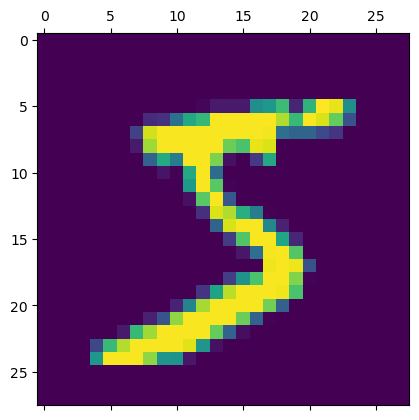

In [3]:
#to see how first image looks
plt.matshow(x_train[0])

In [4]:
#normalising the images by scaling the pixel intensities to the range 0 to 1
x_train = x_train / 255
x_test = x_test / 255

# Creating the Model

In [5]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation = 'relu'),
    keras.layers.Dense(10,activation = 'softmax')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Compile the model

In [7]:
model.compile(optimizer = 'sgd',loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Train the Model

In [8]:
history = model.fit(x_train,y_train,validation_data = (x_test,y_test), epochs = 10)

Epoch 1/10


1875/1875 [==============================] - 9s 4ms/step - loss: 0.6574 - accuracy: 0.8330 - val_loss: 0.3581 - val_accuracy: 0.9027
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3365 - accuracy: 0.9055 - val_loss: 0.2918 - val_accuracy: 0.9187
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2860 - accuracy: 0.9194 - val_loss: 0.2570 - val_accuracy: 0.9276
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2541 - accuracy: 0.9285 - val_loss: 0.2346 - val_accuracy: 0.9344
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2302 - accuracy: 0.9352 - val_loss: 0.2182 - val_accuracy: 0.9380
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2111 - accuracy: 0.9410 - val_loss: 0.2006 - val_accuracy: 0.9451
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1950 - accuracy: 0.9453 - val_loss: 0.1856 - val_accurac

# Evaluate the Model

In [9]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print("Loss = %.3f" %test_loss)
print("Accuracy = %.3f" %test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1562 - accuracy: 0.9565
Loss = 0.156
Accuracy = 0.956


# Making Prediction on New Data

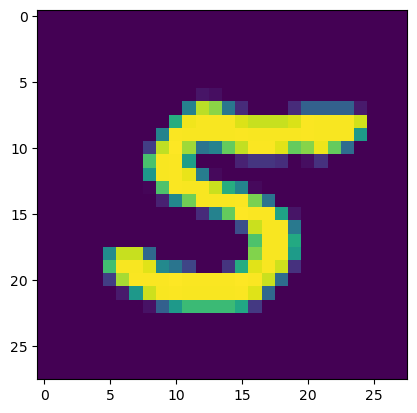

In [10]:
n = random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

# Confusion Matrix

In [11]:
test_predict = model.predict(x_test)
#get classification labels
test_predict_labels = np.argmax(test_predict,axis = 1)
confusion_matrix = tf.math.confusion_matrix(labels = y_test, predictions = test_predict_labels)
print('Confusion Matrix of the Test Set :\n' , confusion_matrix)

313/313 [==============================] - 1s 2ms/step
Confusion Matrix of the Test Set :
 tf.Tensor(
[[ 963    0    0    2    0    4    7    1    2    1]
 [   0 1114    2    2    1    1    4    2    9    0]
 [   5    1  981    8    5    3    7    9   13    0]
 [   0    0   14  967    0    5    0   10   11    3]
 [   1    1    5    1  935    2   11    3    3   20]
 [   7    1    0   13    2  839   11    1   11    7]
 [  10    3    2    1    6    7  925    1    3    0]
 [   1    8   21    4    2    1    0  978    1   12]
 [   4    1    4   13    6    7    8    9  918    4]
 [   8    6    2    9   19    2    1   11    6  945]], shape=(10, 10), dtype=int32)
